In [1]:
datadir='/dls/i16/data/2017/mt16227-1/'# raw data folder
procdir='/dls/science/users/spc93/processing/mt16227/'# data processing folder

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
matplotlib.verbose.set_level("helpful")
from numpy import *
import h5py

from dlstools import dataloader
from dlstools.quickfit import *
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.zylar_path_template)

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


In [2]:
#functions
def sum_images_in_scan(scan, dark_field_image=0, flat_field_image=1):
    #sum images in a scan after removing dark-field image (if specified) and dividing result by flat-field image
    d(scan); imsum=0
    for idx in d.path:
        imsum+=(p(idx).image_01-dark_field_image)*1.0/flat_field_image
    return imsum


<IPython.core.display.Javascript object>


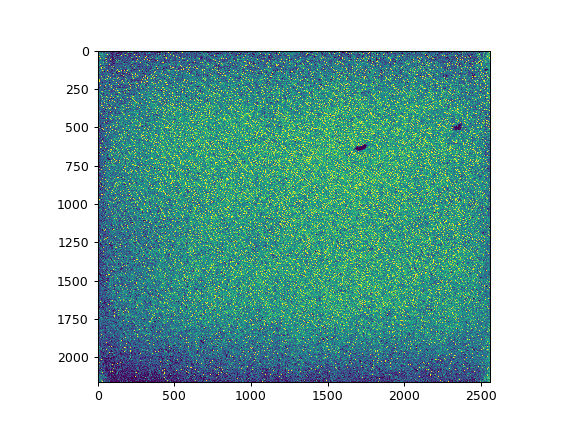

In [21]:
dark_10=sum_images_in_scan(653791)*1.0/len(d(653791).path)#dark images 10 sec exposure
flat=sum_images_in_scan(653794, dark_10); flat=flat/mean(flat)
figure(); imshow(flat, clim=(.9,1.1))
d(653788); pts=len(d.path);
darkfield_1=sum_images_in_scan(653788)*1.0/pts# dark field for 1 sec exposure
xl, xu, yl, yu = 884, 1185-30, 1566, 2150-40

<IPython.core.display.Javascript object>


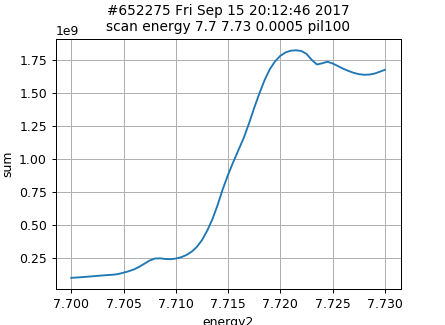

In [14]:
d(652275); d.plot('energy2','sum'); #fluo spectrum

<IPython.core.display.Javascript object>


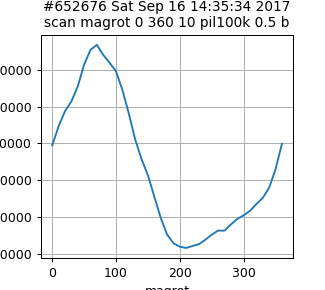

In [15]:
d(652675+1); d.plot('magrot','roi1_sum')

<IPython.core.display.Javascript object>


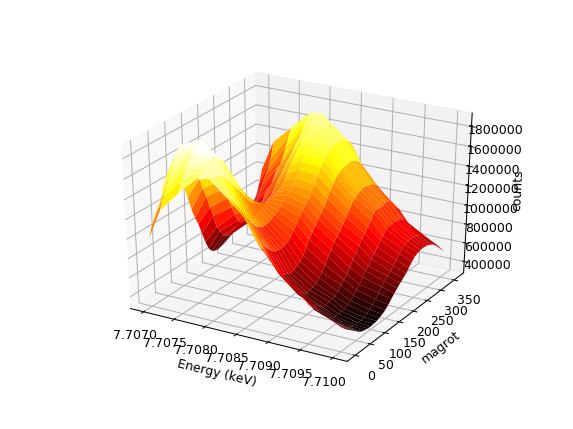

Text(0.5,0,u'counts')

In [215]:
en=[]; roisum=[]; magrot=[]
for scan in range(652675+1,652700+1,2):
    d(scan)
    magrot+=list(d.magrot)
    en+=list(zeros(len(d.magrot))+d.en)
    roisum+=list(d.roi1_sum)
xm, ym, zm = dataloader.vec2mat(en, magrot, roisum)
figure(); gca(projection='3d').plot_surface(xm, ym, zm, cmap=cm.hot); xlabel('Energy (keV)'); ylabel('magrot'); gca().set_zlabel('counts')


<IPython.core.display.Javascript object>


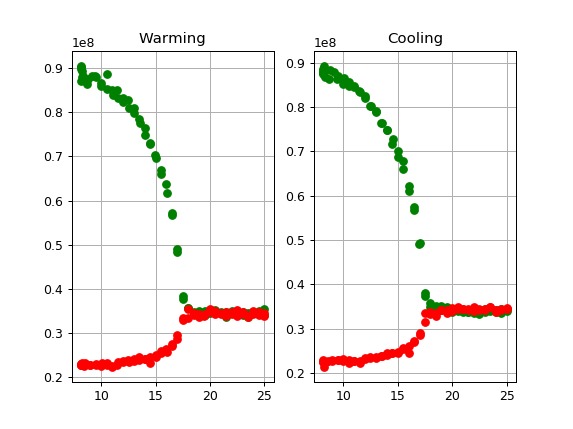

In [217]:
figure()
subplot(1,2,1)
Ta=[]; Tb=[]; Dsum=[]
for n in range(652877,653025,2):
    d(n)
    [centre, width, sum, height, area, m, c, bg]=peak(d.eta,d.zyroi1_sum,10)
    Ta+=[d.Ta]; Tb+=[d.Tb]; Dsum+=[sum] 
plot(Ta, Dsum,'og',hold=1)

Ta=[]; Tb=[]; Dsum=[]
for n in range(652877+1,653025,2):
    d(n)
    #figure(); plot(d.eta,d.sum);
    [centre, width, sum, height, area, m, c, bg]=peak(d.eta,d.zyroi1_sum,10)
    Ta+=[d.Ta]; Tb+=[d.Tb]; Dsum+=[sum] 
plot(Ta, Dsum,'or',hold=1); title('Warming')
grid(1)
subplot(1,2,2)
Ta=[]; Tb=[]; Dsum=[]
for n in range(653025,653172,2):
    d(n)
    [centre, width, sum, height, area, m, c, bg]=peak(d.eta,d.zyroi1_sum,10)
    Ta+=[d.Ta]; Tb+=[d.Tb]; Dsum+=[sum] 
plot(Ta, Dsum,'og',hold=1)

Ta=[]; Tb=[]; Dsum=[]
for n in range(653025+1,653172,2):
    d(n)
    #figure(); plot(d.eta,d.sum);
    [centre, width, sum, height, area, m, c, bg]=peak(d.eta,d.zyroi1_sum,10)
    Ta+=[d.Ta]; Tb+=[d.Tb]; Dsum+=[sum] 
plot(Ta, Dsum,'or',hold=1); title('Cooling')
grid(1)
savefig('/home/spc93/tmp/phase_trans.pdf')


<IPython.core.display.Javascript object>


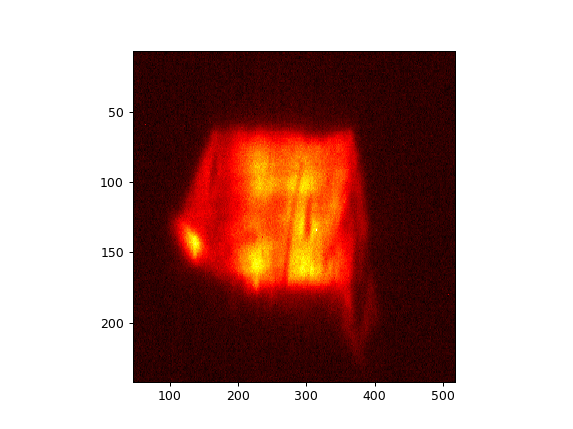

In [19]:
im_652731=sum_images_in_scan(652731, darkfield_1, flat)
im=im_652731; figure(); imshow(im[xl:xu, yl:yu], clim=(1500,7000), cmap=cm.hot, aspect=1/sin(29*pi/180))

<IPython.core.display.Javascript object>


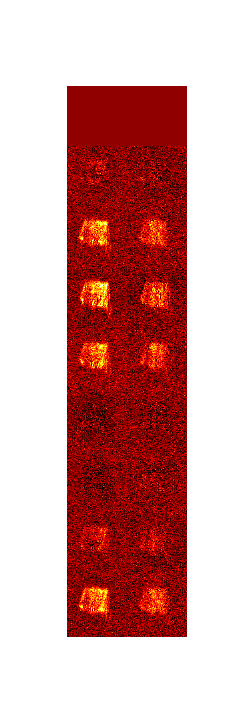

In [30]:
#stack((im_e1, im_e2))
figure(); axis('off'); imshow(big_image, aspect=1/sin(29*pi/180), clim=(-200,800), cmap=cm.hot)
#, clim=(120,400)
#images[1].shape
#temp
#len(d(653206).path)

<IPython.core.display.Javascript object>


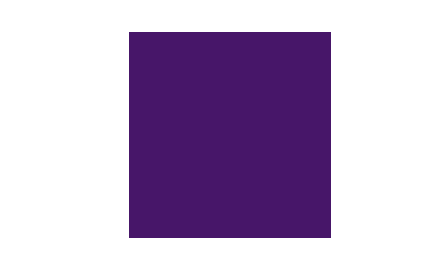

In [24]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots(figsize=(5, 3))
axis('off');

cax = ax.imshow(images_e1[0], aspect=1/sin(29*pi/180), clim=(-50,800))
    
def animate(i):
    cax.set_array(images_e1[i])
    cax.set_array((images_e1[i]-images_e2[i])/images_e1[0])
    #ax.set_title('T=%.1f' % temp[i])
       
anim = FuncAnimation(fig, animate, frames=range(len(temp)))
#anim.save('day17sept17a_e1.mp4', dpi=400)




scan= 652731 Sat Sep 16 18:42:54 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652732 Sat Sep 16 18:44:30 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652733 Sat Sep 16 18:46:08 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652734 Sat Sep 16 18:47:47 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652735 Sat Sep 16 18:49:26 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652736 Sat Sep 16 18:51:34 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652737 Sat Sep 16 18:53:12 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652738 Sat Sep 16 18:54:49 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652739 Sat Sep 16 18:56:27 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 6527

scan= 652815 Sat Sep 16 21:05:15 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652816 Sat Sep 16 21:06:52 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652817 Sat Sep 16 21:08:32 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652818 Sat Sep 16 21:10:09 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652819 Sat Sep 16 21:12:02 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652820 Sat Sep 16 21:13:40 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652821 Sat Sep 16 21:15:17 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 652822 Sat Sep 16 21:16:53 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 7.0
scan= 652823 Sat Sep 16 21:18:31 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 7.0
scan= 6528

scan= 652899 Sat Sep 16 23:39:26 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 12.5
scan= 652900 Sat Sep 16 23:41:33 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 12.5
scan= 652901 Sat Sep 16 23:44:11 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 13.0
scan= 652902 Sat Sep 16 23:45:46 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 13.0
scan= 652903 Sat Sep 16 23:48:21 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 13.5
scan= 652904 Sat Sep 16 23:49:58 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 13.5
scan= 652905 Sat Sep 16 23:52:58 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 14.0
scan= 652906 Sat Sep 16 23:54:36 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 14.0
scan= 652907 Sat Sep 16 23:57:12 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 14.5
s

scan= 652983 Sun Sep 17 02:44:37 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 17.0
scan= 652984 Sun Sep 17 02:46:14 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 17.0
scan= 652985 Sun Sep 17 02:48:52 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 16.5
scan= 652986 Sun Sep 17 02:50:52 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 16.5
scan= 652987 Sun Sep 17 02:53:30 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 16.0
scan= 652988 Sun Sep 17 02:55:06 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 16.0
scan= 652989 Sun Sep 17 02:57:40 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 15.5
scan= 652990 Sun Sep 17 02:59:18 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 15.5
scan= 652991 Sun Sep 17 03:02:21 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 15.0
s

scan= 653070 Sun Sep 17 05:54:29 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 18.0
scan= 653071 Sun Sep 17 05:57:07 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 18.5
scan= 653072 Sun Sep 17 05:58:45 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 18.5
scan= 653073 Sun Sep 17 06:01:48 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 19.0
scan= 653074 Sun Sep 17 06:03:25 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 19.0
scan= 653075 Sun Sep 17 06:06:00 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 19.5
scan= 653076 Sun Sep 17 06:07:38 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 19.5
scan= 653077 Sun Sep 17 06:10:15 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 20.0
scan= 653078 Sun Sep 17 06:11:54 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 20.0
s

scan= 653158 Sun Sep 17 09:06:44 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 10.5
scan= 653159 Sun Sep 17 09:09:21 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 10.0
scan= 653160 Sun Sep 17 09:11:25 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 10.0
scan= 653161 Sun Sep 17 09:14:01 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 9.5
scan= 653162 Sun Sep 17 09:15:37 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 9.5
scan= 653163 Sun Sep 17 09:18:15 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 9.0
scan= 653164 Sun Sep 17 09:19:56 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 9.0
scan= 653165 Sun Sep 17 09:22:56 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 8.5
scan= 653166 Sun Sep 17 09:24:34 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 8.5
scan= 6

scan= 653233 Sun Sep 17 12:21:27 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 15.5
scan= 653234 Sun Sep 17 12:24:14 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 15.0
scan= 653235 Sun Sep 17 12:25:59 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 15.0
scan= 653236 Sun Sep 17 12:28:40 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 14.5
scan= 653237 Sun Sep 17 12:30:51 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 14.5
scan= 653238 Sun Sep 17 12:33:34 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 14.0
scan= 653239 Sun Sep 17 12:35:19 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 14.0
scan= 653240 Sun Sep 17 12:38:05 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 13.5
scan= 653241 Sun Sep 17 12:39:52 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 13.5
s

scan= 653319 Sun Sep 17 15:34:00 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 21.5
scan= 653320 Sun Sep 17 15:36:37 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 22.0
scan= 653321 Sun Sep 17 15:38:14 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 22.0
scan= 653322 Sun Sep 17 15:40:51 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 22.0
scan= 653323 Sun Sep 17 15:42:28 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 22.0
scan= 653324 Sun Sep 17 15:45:04 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 21.5
scan= 653325 Sun Sep 17 15:46:41 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 21.5
scan= 653326 Sun Sep 17 15:49:16 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.707 T= 21.0
scan= 653327 Sun Sep 17 15:51:19 2017 scancn eta 0.0025 41 BeamOK zylar 1 zyroi1 psi= 50.001 en= 7.709 T= 21.0
s

scan= 653403 Sun Sep 17 19:07:43 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.709 T= 10.0
scan= 653404 Sun Sep 17 19:10:28 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 11.0
scan= 653405 Sun Sep 17 19:12:05 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 11.0
scan= 653406 Sun Sep 17 19:13:51 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 11.0
scan= 653407 Sun Sep 17 19:15:27 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9992 en= 7.709 T= 11.0
scan= 653408 Sun Sep 17 19:18:13 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 12.0
scan= 653409 Sun Sep 17 19:19:50 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 12.0
scan= 653410 Sun Sep 17 19:22:02 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 12.0
scan= 653411 Sun Sep 17 19:23:37 2017 scancn eta 0.0025 41 B

scan= 653473 Sun Sep 17 21:29:43 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 17.0
scan= 653474 Sun Sep 17 21:31:54 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9994 en= 7.707 T= 17.0
scan= 653475 Sun Sep 17 21:33:32 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9994 en= 7.709 T= 17.0
scan= 653476 Sun Sep 17 21:36:19 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 16.0
scan= 653477 Sun Sep 17 21:37:57 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 16.0
scan= 653478 Sun Sep 17 21:39:40 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 16.0
scan= 653479 Sun Sep 17 21:41:45 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.709 T= 16.0
scan= 653480 Sun Sep 17 21:44:28 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 15.0
scan= 653481 Sun Sep 17 21:46:02 2017 scancn eta 0.0025 41 B

scan= 653557 Mon Sep 18 00:32:24 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653558 Mon Sep 18 00:34:10 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 8.0
scan= 653559 Mon Sep 18 00:35:47 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9994 en= 7.709 T= 8.0
scan= 653560 Mon Sep 18 00:39:38 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653561 Mon Sep 18 00:41:41 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653562 Mon Sep 18 00:43:27 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9994 en= 7.707 T= 8.0
scan= 653563 Mon Sep 18 00:45:04 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9994 en= 7.709 T= 8.0
scan= 653564 Mon Sep 18 00:49:00 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653565 Mon Sep 18 00:51:04 2017 scancn eta 0.0025 41 BeamOK zy

scan= 653641 Mon Sep 18 03:45:09 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653642 Mon Sep 18 03:46:55 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 8.0
scan= 653643 Mon Sep 18 03:48:34 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.709 T= 8.0
scan= 653644 Mon Sep 18 03:52:54 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653645 Mon Sep 18 03:54:32 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653646 Mon Sep 18 03:56:19 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.707 T= 8.0
scan= 653647 Mon Sep 18 03:57:56 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9993 en= 7.709 T= 8.0
scan= 653648 Mon Sep 18 04:01:46 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653649 Mon Sep 18 04:03:24 2017 scancn eta 0.0025 41 BeamOK zy

scan= 653725 Mon Sep 18 06:58:37 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653726 Mon Sep 18 07:00:44 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9992 en= 7.707 T= 8.0
scan= 653727 Mon Sep 18 07:02:20 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9992 en= 7.709 T= 8.0
scan= 653728 Mon Sep 18 07:06:14 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653729 Mon Sep 18 07:07:52 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.709 T= 8.0
scan= 653730 Mon Sep 18 07:09:38 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9992 en= 7.707 T= 8.0
scan= 653731 Mon Sep 18 07:11:41 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= -9.9992 en= 7.709 T= 8.0
scan= 653732 Mon Sep 18 07:15:37 2017 scancn eta 0.0025 41 BeamOK zylar 1 zybg1 zyroi1 psi= 50.001 en= 7.707 T= 8.0
scan= 653733 Mon Sep 18 07:17:16 2017 scancn eta 0.0025 41 BeamOK zy

<IPython.core.display.Javascript object>


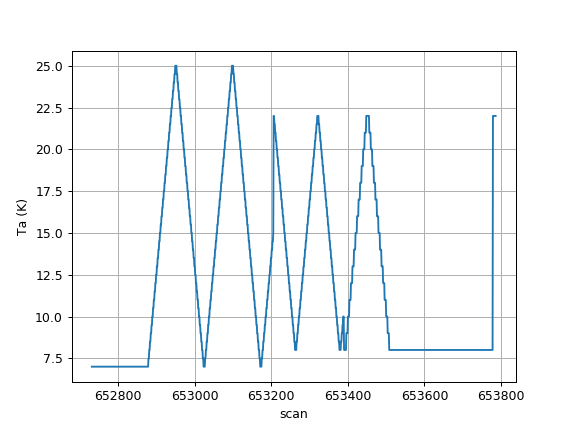

In [35]:
#find files
#653787 does not exist
T=[]; scans=range(652731, 653787);
for i in scans:
    d(i); 
    print 'scan=', i, d.date, d.cmd, 'psi=',d.psi, 'en=',d.en, 'T=', d.Tset
    T+=[d.Tset]
figure(); plot(scans, T); xlabel('scan'); ylabel('Ta (K)'); grid(1)

<IPython.core.display.Javascript object>


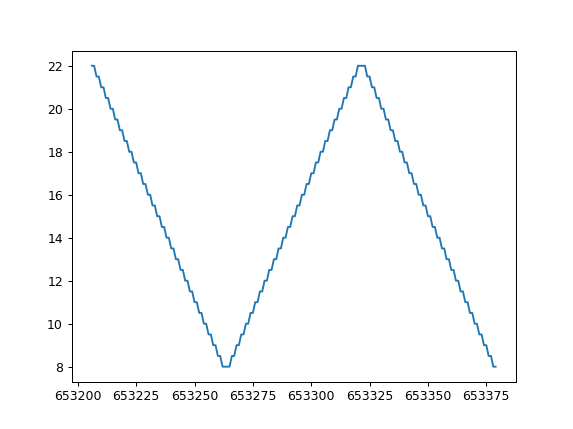

((174,), (174,), (174,))

In [53]:
figure(); plot(scans, temp)
temp.shape, temp.shape, scans.shape

[u'energy', u'images', u'psi', u'scans', u'temp']


<IPython.core.display.Javascript object>


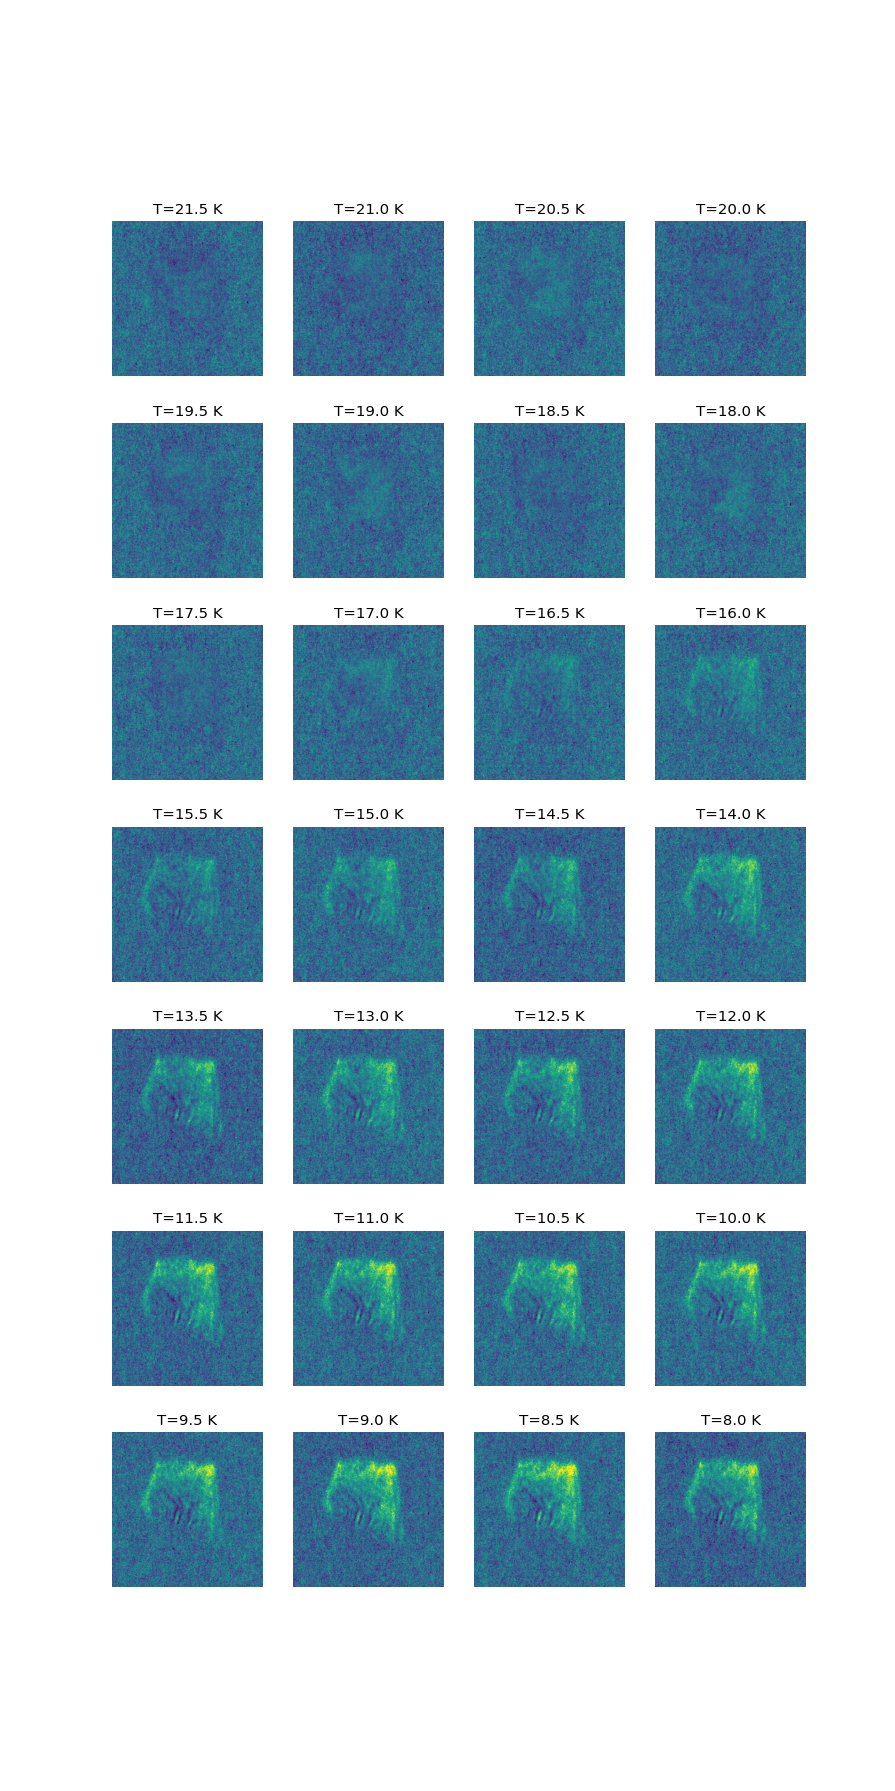

In [4]:
f=h5py.File(procdir+'day17sept17a_all.hdf5','r') #read back saved data
print f.keys()
images = array(f.get('images'))
temp = array(f.get('temp'))
energy = array(f.get('energy'))
psi = array(f.get('psi'))
scans = array(f.get('scans'))
f.close()

f=h5py.File(procdir+'dark1.hdf5','r') #read back saved data
im_dark = array(f.get('images'))
f.close()

figure(figsize=(10,20))
#clim=None
clim=[-.1, .2]
cmap=cm.viridis
I22e1=images[0]
I22e2=images[1]
#for i in range(0,len(energy),2):
sp=0
for i in range(2,57,2):
    im_norm=1.0*(images[i]-I22e1)/(I22e1-im_dark[0])-1.0*(images[i+1]-I22e2)/(I22e2-im_dark[0])
    sp+=1; subplot(7,4,sp); axis('off')
    imshow(im_norm, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180),interpolation='bilinear'); title('T=%.1f K' % temp[i])
savefig('/home/spc93/tmp/tcycle_viridis.pdf', dpi=200)  

<IPython.core.display.Javascript object>


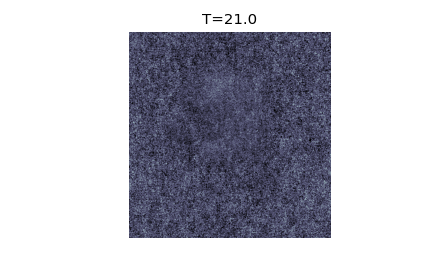

Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
MovieWriter.run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x600 -pix_fmt rgba -r 5.0 -loglevel quiet -i pipe: -vcodec h264 -pix_fmt yuv420p -y /home/spc93/tmp/day17sept17a.mp4


In [259]:
#run previous cell first
from matplotlib.animation import FuncAnimation
fig, ax = subplots(figsize=(5, 3))
axis('off');

scn=range(2,114,2)
#scn=range(2,54,2)

cax = ax.imshow(images[scn[0]], aspect=1/sin(29*pi/180), clim=[-.1, .2], interpolation='bilinear', cmap=cm.bone)
    
def animate(i):
    #cax.set_array(images_e1[i])
    #cax.set_array((images_e1[i]-images_e2[i])/images_e1[0])
    ax.set_title('T=%.1f' % temp[scn[i]])
    cax.set_array(1.0*(images[scn[i]]-I22e1)/(I22e1-im_dark[0])-1.0*(images[scn[i]+1]-I22e2)/(I22e2-im_dark[0]))
       
anim = FuncAnimation(fig, animate, frames=range(len(scn)))
anim.save('/home/spc93/tmp/day17sept17a.mp4', dpi=200)




<IPython.core.display.Javascript object>


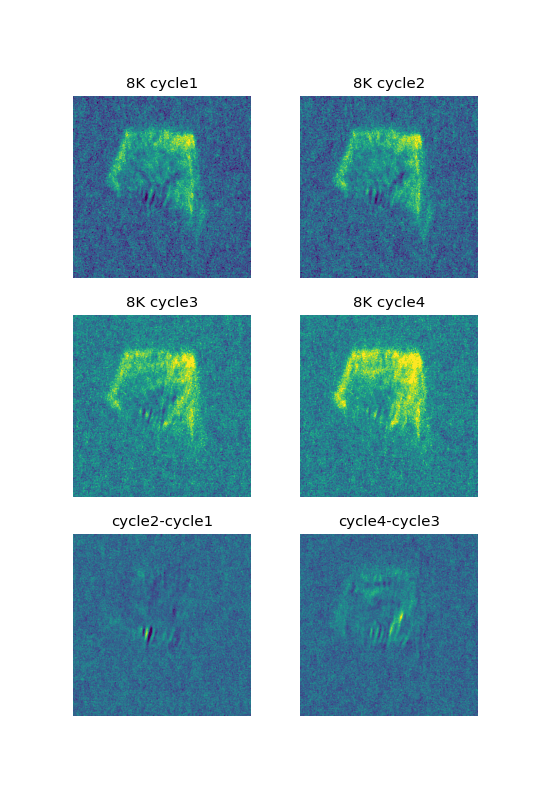

In [6]:
#four independent T=8K images (four cools), psi=50, two energies in subsequent files
#scns_8k=[653262, 653378, 653392, 653508]
#22K files: 653320, 653452

clim=[-.1, .2]
#cmap=cm.bone
cmap=cm.viridis

f=h5py.File(procdir+'day17sept17a_all.hdf5','r') #read back saved data
images = array(f.get('images'))
scans = array(f.get('scans'))
f.close()

f=h5py.File(procdir+'dark1.hdf5','r') #read back saved data
im_dark = array(f.get('images'))
f.close()


num8k_1, num8k_2, num22k=list(scans).index(653262), list(scans).index(653378), list(scans).index(653320)

im1=1.0*(images[num8k_1]-images[num22k])/(images[num22k]-im_dark[0])-1.0*(images[num8k_1+1]-images[num22k+1])/(images[num22k+1]-im_dark[0])
im2=1.0*(images[num8k_2]-images[num22k])/(images[num22k]-im_dark[0])-1.0*(images[num8k_1+1]-images[num22k+1])/(images[num22k+1]-im_dark[0])


figure(figsize=(6,9))
subplot(3,2,1); axis('off'); imshow(im1, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('8K cycle1')
subplot(3,2,2); axis('off'); imshow(im2, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('8K cycle2')


f=h5py.File(procdir+'night17sept17a_all.hdf5','r') #read back saved data
images = array(f.get('images'))
scans = array(f.get('scans'))
f.close()

num8k_1, num8k_2, num22k=list(scans).index(653392), list(scans).index(653508), list(scans).index(653452)

im3=1.0*(images[num8k_1]-images[num22k])/(images[num22k]-im_dark[0])-1.0*(images[num8k_1+1]-images[num22k+1])/(images[num22k+1]-im_dark[0])
im4=1.0*(images[num8k_2]-images[num22k])/(images[num22k]-im_dark[0])-1.0*(images[num8k_1+1]-images[num22k+1])/(images[num22k+1]-im_dark[0])


imd1=im2-im1
imd2=im4-im3

subplot(3,2,3); axis('off'); imshow(im3, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('8K cycle3')
subplot(3,2,4); axis('off'); imshow(im4, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('8K cycle4')

subplot(3,2,5); axis('off'); imshow(imd1, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('cycle2-cycle1')
subplot(3,2,6); axis('off'); imshow(imd2, clim=clim, cmap=cmap, aspect=1/sin(29*pi/180), interpolation='bilinear'); title('cycle4-cycle3')


savefig('/home/spc93/tmp/8k_domains_viridis.pdf', dpi=200)  









